In [ ]:
import os
import json
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

from minima_volume.analysis_funcs import (  grab_folder_names,
                                            load_base_train_size,
                                            list_additional_data,
                                            load_param_num,
                                            multiple_minima_fixed_landscape,
                                            fixed_landscape_minima_labels,
                                            plot_fixed_landscape_minima_pair,
                                            model_volume_across_targets,
                                            append_cutoff_points,
                                            varying_landscape_minima_labels,
                                            plot_minima_volume_vs_data_level,                    
)

problem_name = "MNIST"

loss_value = 0.1  # Loss value to analyze
data_level_log = False #Is the data log distributed?
base_output_dir = "analysis"  # Root folder to save all plots
os.makedirs(base_output_dir, exist_ok=True)

# Data for the loss landscape levels
experiment_folders, data_modifications = grab_folder_names()
data_modifications = ['data_0']

base_train_size = load_base_train_size(experiment_folders[0])
model_data_sizes = list_additional_data(experiment_folders[0])
num_params = load_param_num(experiment_folders[0], data_modifications[0], loss_value = loss_value)

base_shift = 0
if data_modifications[0].startswith("data_"):
    base_shift = base_train_size  # Shift to reflect true dataset size

print("Experiment folders: ", experiment_folders)
print("Different data levels where loss landscapes were computed:", data_modifications)
print("The base train size is: ", base_train_size)
print("Data levels where models were trained: ", model_data_sizes)
print("The number of model parameters is ", num_params)

First entry: Model_0, base_train_size = 10000
Experiment folders:  ['model_40_data_10', 'model_0_data_10', 'model_22_data_10', 'model_32_data_10', 'model_14_data_10', 'model_49_data_10', 'model_9_data_10', 'model_15_data_10', 'model_8_data_10', 'model_48_data_10', 'model_1_data_10', 'model_41_data_10', 'model_33_data_10', 'model_23_data_10', 'model_17_data_10', 'model_38_data_10', 'model_28_data_10', 'model_21_data_10', 'model_31_data_10', 'model_3_data_10', 'model_43_data_10', 'model_30_data_10', 'model_20_data_10', 'model_42_data_10', 'model_2_data_10', 'model_16_data_10', 'model_29_data_10', 'model_39_data_10', 'model_13_data_10', 'model_25_data_10', 'model_35_data_10', 'model_47_data_10', 'model_7_data_10', 'model_34_data_10', 'model_24_data_10', 'model_6_data_10', 'model_46_data_10', 'model_12_data_10', 'model_4_data_10', 'model_44_data_10', 'model_26_data_10', 'model_36_data_10', 'model_19_data_10', 'model_10_data_10', 'model_11_data_10', 'model_45_data_10', 'model_5_data_10', 'm

In [7]:
# Preparation for the specific plots
import matplotlib as mpl

#cmap = mpl.colormaps.get_cmap("winter")  # blue → green
#background_colors = [cmap(i) for i in np.linspace(0, 1, 10)]

#natural_label = "Minima (On Base Dataset)"
other_label = "Minima (Larger Datasets)"

In [8]:
for data_modification in data_modifications:
    print(f"\nProcessing data modification folder: {data_modification}")

    # Create output folder for this data_modification
    save_dir = os.path.join(base_output_dir, data_modification)
    os.makedirs(save_dir, exist_ok=True)

    # Get axis labels and titles
    labels = fixed_landscape_minima_labels(data_modification, base_train_size)

    # Extract minima landscapes
    all_mdl, all_log_rn, all_test_loss, all_test_acc = multiple_minima_fixed_landscape(
        experiment_folders, data_modification, loss_value #mdl is modification data level
    )
    print(all_log_rn)
    print(all_test_acc)


Processing data modification folder: data_0
[[645954.2617571262], [618328.6005721551], [629269.4788358985], [671392.0336403684], [618932.2801684889], [606611.8775447016], [610083.1856166339], [627260.0934843096], [623994.576248382], [626543.1407659014], [601267.6377141628], [634837.8550285723], [626705.8022696875], [615383.3751127938], [604681.4192057891], [612672.4286446655], [610270.9379034848], [635325.7416051031], [655573.0332783352], [629713.0124367678], [583956.7245306529], [607285.7892355782], [614971.1007496235], [615383.3751127938], [658910.783674111], [635392.1462431944], [621693.1349139075], [637731.6388178589], [618700.6612287406], [610495.1773184413], [601462.0187957821], [626639.6702874303], [620651.4872902913], [615085.8365345671], [647926.9459344236], [623861.511448302], [618016.5921280512], [627234.7951739718], [645364.3195340134], [638046.5816789018], [635325.7416051031], [618984.9474333592], [609453.5296948252], [601918.1857944797], [642862.6883675983], [623676.6088

In [9]:
all_log_rn_list = [val for sublist in all_log_rn for val in sublist]
all_test_acc_list = [val for sublist in all_test_acc for val in sublist]

print(all_log_rn_list)
print(all_test_acc_list)

[645954.2617571262, 618328.6005721551, 629269.4788358985, 671392.0336403684, 618932.2801684889, 606611.8775447016, 610083.1856166339, 627260.0934843096, 623994.576248382, 626543.1407659014, 601267.6377141628, 634837.8550285723, 626705.8022696875, 615383.3751127938, 604681.4192057891, 612672.4286446655, 610270.9379034848, 635325.7416051031, 655573.0332783352, 629713.0124367678, 583956.7245306529, 607285.7892355782, 614971.1007496235, 615383.3751127938, 658910.783674111, 635392.1462431944, 621693.1349139075, 637731.6388178589, 618700.6612287406, 610495.1773184413, 601462.0187957821, 626639.6702874303, 620651.4872902913, 615085.8365345671, 647926.9459344236, 623861.511448302, 618016.5921280512, 627234.7951739718, 645364.3195340134, 638046.5816789018, 635325.7416051031, 618984.9474333592, 609453.5296948252, 601918.1857944797, 642862.6883675983, 623676.6088009865, 634975.4186480985, 615695.2039283892, 615804.0400433037, 624451.4536714148]
[0.9487000107765198, 0.9506000280380249, 0.950200021

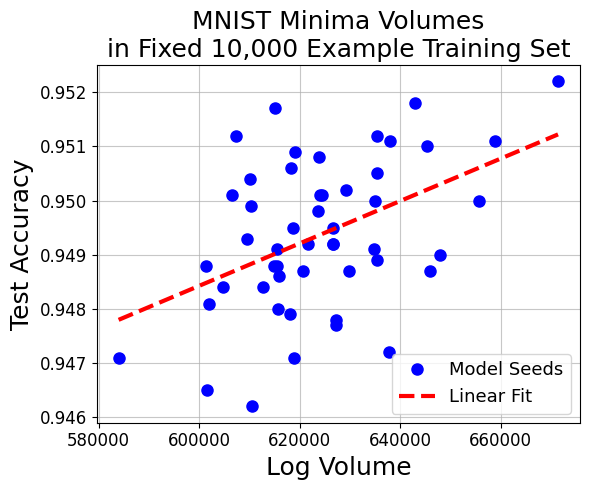

In [10]:
from minima_volume.volume_funcs import plot_pair_metrics


plot_pair_metrics(
    # metric1_values=all_test_loss_list,
    metric1_values=all_log_rn_list,
    metric2_values=all_test_acc_list,
    # metric2_values=all_log_rn_list,
    # xlabel="Test Loss",
    xlabel="Log Volume",
    ylabel="Test Accuracy",
    # ylabel="Log Volume",
    title="MNIST Minima Volumes\nin Fixed 10,000 Example Training Set",
    display=True,
    connect_dots=False,
    label='Model Seeds',
    show_best_fit=True,
    xlabel_size=18, ylabel_size=18, title_size=18, legend_size = 13,
    alpha=0.7
)